# Prediction of GS Energies of Small Organic Molecules

First, useful libraries are imported 

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from six.moves import urllib
import os
np.random.seed(42)
%matplotlib inline

## Get Data
The dataset was obtained from https://www.kaggle.com/burakhmmtgl/energy-molecule/downloads/energy-molecule.zip/1
It contains 16242 instances consisting of the coulomb matrix and the corresponding energies

In [2]:
dataset = pd.read_csv("roboBohr.csv")

In [3]:
dataset.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


Columns labeled 0 to 1274 are entries of the coulomb matrix (since matrix is symmetrical only upper triangular number are included)

In [4]:
cleandf = dataset.drop(["Unnamed: 0","pubchem_id"],axis = 1)

In [5]:
cleandf.Eat.describe()

count    16242.000000
mean       -11.178969
std          3.659133
min        -23.245373
25%        -13.475805
50%        -10.835211
75%         -8.623903
max         -0.789513
Name: Eat, dtype: float64

The distribution of the energies is plotted below

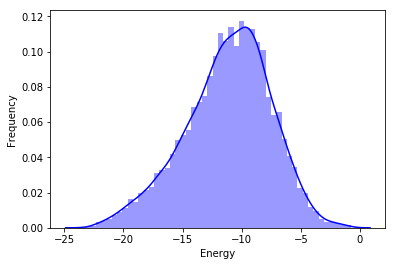

In [6]:
sns.distplot(dataset['Eat'], kde=True, color='b')
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()

In [7]:
cleandf.isnull().sum().sum()

0

The coulomb matrix of molecules that are made up of less than 50 atoms are padded with zeroes so that the input dimensions are consistent.

In [8]:
features = cleandf.drop(['Eat'], axis =1)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,...,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
targets = cleandf["Eat"]
targets.head()

0   -19.013763
1   -10.161019
2    -9.376619
3   -13.776438
4    -8.537140
Name: Eat, dtype: float64

The dataset features are normalized 

In [10]:
from sklearn.preprocessing import normalize

normalized_features = normalize(features)
normalized_features = pd.DataFrame(normalized_features)
normalized_features.head()

,0,1,2,3,4,5,6,7,8,9,...,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274
0,0.413152,0.100133,0.070077,0.070013,0.069993,0.069952,0.069872,0.069837,0.069616,0.069495,...,0.00281,0.0,0.0,0.0,0.00281,0.0,0.0,0.0,0.0,0.0
1,0.347404,0.097578,0.087553,0.084547,0.084530,0.084453,0.084363,0.083783,0.074967,0.071958,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.557493,0.135212,0.094883,0.094068,0.093990,0.093968,0.093459,0.092804,0.079042,0.065965,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.391255,0.095135,0.095111,0.095064,0.095002,0.095000,0.066834,0.066832,0.066618,0.066228,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.495991,0.120656,0.120551,0.120523,0.120215,0.084391,0.084269,0.083996,0.071495,0.071487,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


The dataset is split into training, validation, and testing sets

In [11]:
from sklearn.model_selection import train_test_split

X, test_X, y, test_y = train_test_split(normalized_features, targets, test_size = 0.20)
train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=0.20)
print("Dim of training features: ", train_X.shape)
print("Dim of training target: ", train_y.shape)
print("Dim of training features: ", val_X.shape)
print("Dim of training target: ", val_y.shape)
print("Dim of testing features: ", test_X.shape)
print("Dim of training features: ", test_y.shape)

Dim of training features:  (10394, 1275)
Dim of training target:  (10394,)
Dim of training features:  (2599, 1275)
Dim of training target:  (2599,)
Dim of testing features:  (3249, 1275)
Dim of training features:  (3249,)


The distribution of the validation and test sets are also plotted to confirm that it is closely similar to the training set's distribution

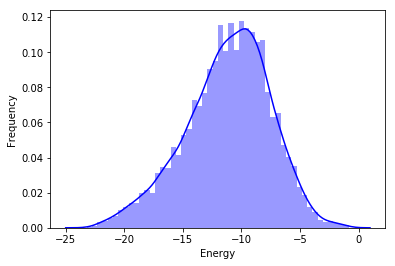

count    10394.000000
mean       -11.171837
std          3.638282
min        -23.214579
25%        -13.433004
50%        -10.837684
75%         -8.611879
max         -0.817791
Name: Eat, dtype: float64

In [12]:
sns.distplot(train_y, kde=True, color='b')
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()
train_y.describe()

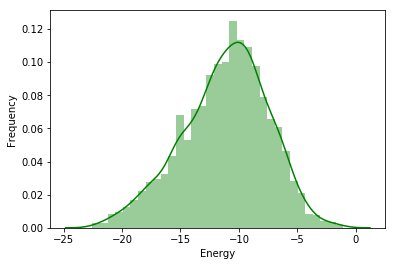

count    3249.000000
mean      -11.185439
std         3.684745
min       -22.530841
25%       -13.529756
50%       -10.810402
75%        -8.633085
max        -1.074958
Name: Eat, dtype: float64

In [13]:
sns.distplot(test_y, kde=True, color='g')
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()
test_y.describe()

## Linear Regression

We first try a simple linear regression model to observe if there is any linear relationship

In [14]:
train_X_full = np.concatenate((train_X.values,val_X.values),axis = 0)
train_y_full = np.concatenate((train_y.values,val_y.values),axis = 0)

In [15]:
from sklearn.linear_model import LinearRegression

simple_LR = LinearRegression(n_jobs = -1)

simple_LR.fit(train_X_full,train_y_full)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

simple_prediction = simple_LR.predict(test_X)
training_prediction = simple_LR.predict(train_X_full)

print("Training error: ",np.sqrt(mean_squared_error(train_y_full,training_prediction)) )
print('RMSE (LR): ',np.sqrt(mean_squared_error(test_y,simple_prediction)))
print('MAE (LR): ',mean_absolute_error(simple_prediction,test_y))

Training error:  0.7347979879990052
RMSE (LR):  181.86009986638436
MAE (LR):  11.87898970468376


Clearly a linear regression model does not work well, the training rmse is low compared to the test error. Additonally, the rmse and mae are too high for the test set. There seems to be a lot of overfitting. 
<br>
Next, We try to visualize the features using PCA and T-SNE

## PCA 

Explained Variance:  0.6282906017046906


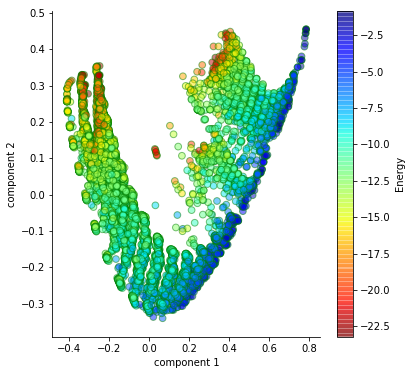

In [17]:
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.cm as cm
pca = PCA(n_components=2, random_state=42)
train_X_reduced = pca.fit_transform(train_X)
print("Explained Variance: ", pca.explained_variance_ratio_.sum())
figure = plt.figure(figsize = (6,6))
plot = figure.add_subplot(111)
scatter = plot.scatter(train_X_reduced[:,0], train_X_reduced[:,1],c=train_y, s=45, edgecolors = 'green', cmap=cm.jet_r, alpha = 0.5)
cbar = figure.colorbar(scatter, ax=plot, label = "Energy")
plt.xlabel("component 1")
plt.ylabel("component 2")
sns.despine()
plt.show()

## T-SNE

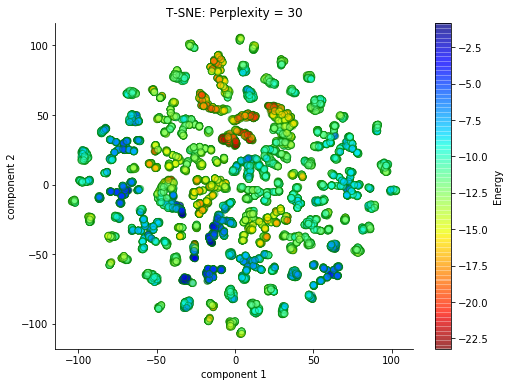

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(train_X)

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111)

scatter = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=train_y, s=45, edgecolors='green', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "Energy")
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title('T-SNE: Perplexity = 30')
sns.despine()
plt.show()


The visualization indicates that the reduced dataset using PCA could be used for training. However, we will look at other regression models to see if we can lower the generalization errors. Below, Ridge, Lasso and ElasticNet Regressors are explored.

## Linear Ridge Regression

In [19]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(train_X_full, train_y_full)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='cholesky', tol=0.001)

In [20]:
ridge_prediction = ridge_reg.predict(test_X)
training_prediction_ridge = ridge_reg.predict(train_X_full)
print("Training error: ",np.sqrt(mean_squared_error(train_y_full,training_prediction_ridge)) )
print('RMSE (LR): ',np.sqrt(mean_squared_error(test_y,ridge_prediction)))
print('MAE (LR): ',mean_absolute_error(ridge_prediction,test_y))

Training error:  0.8885639715974217
RMSE (LR):  0.9059311954877263
MAE (LR):  0.5960257084694186


Better results are obtained with the ridge regressor and the model seems to generalize well.
<br>
Next, lasso regression is tried

## LASSO Regression

In [21]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(train_X_full, train_y_full)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
lasso_prediction = lasso_reg.predict(test_X)
training_prediction_lasso = lasso_reg.predict(train_X_full)
print("Training error: ",np.sqrt(mean_squared_error(train_y_full,training_prediction_lasso)) )
print('RMSE (LR): ',np.sqrt(mean_squared_error(test_y,lasso_prediction)))
print('MAE (LR): ',mean_absolute_error(lasso_prediction,test_y))

Training error:  1.5781755639784731
RMSE (LR):  1.570296876293412
MAE (LR):  1.1602036893762655


Lasso regression is not as good as ridge but generalizes well. Next, elastic net regressor is trained.

## Elastic Net Regression

In [23]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
elastic_net.fit(train_X_full, train_y_full)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
elastic_prediction = elastic_net.predict(test_X)
training_prediction_elastic = elastic_net.predict(train_X_full)
print("Training error: ",np.sqrt(mean_squared_error(train_y_full,training_prediction_elastic)) )
print('RMSE (LR): ',np.sqrt(mean_squared_error(test_y,elastic_prediction)))
print('MAE (LR): ',mean_absolute_error(elastic_prediction,test_y))

Training error:  1.6901797715894589
RMSE (LR):  1.679950770357625
MAE (LR):  1.2473093212465993


Likewise, Elastic net does not seem to be a good model. Since the ridge regressor worked the best, the best alpha value to be used is determined below

In [25]:
ridge_models = {}
for i in [0.001, 0.1, 0.5, 1, 5]:
    ridge_models[str(i)] = Ridge(alpha=i)
    ridge_models[str(i)].fit(train_X_full, train_y_full)
    pred = ridge_models[str(i)].predict(test_X)
    print(i , "MAE: ", mean_absolute_error(test_y,pred))
    print('RMSE (rr): ',np.sqrt(mean_squared_error(test_y,pred)))

0.001 MAE:  0.5515769264914904
RMSE (rr):  0.8309482186415829
0.1 MAE:  0.5526080159833296
RMSE (rr):  0.835751983303131
0.5 MAE:  0.5694165467651445
RMSE (rr):  0.866778550192776
1 MAE:  0.5960257084694186
RMSE (rr):  0.9059311954877263
5 MAE:  0.7541549646748515
RMSE (rr):  1.1009324990087144


The model with the smallest alpha gives the smallest error
<br>
Next, we look at the ensemble models

# Ensemble Models
## KNeighbors Regressor

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn_models = {}
for i in range(1, 10):
    knn_models[str(i)] = KNeighborsRegressor(n_neighbors=i)
    knn_models[str(i)].fit(train_X, train_y)
    pred = knn_models[str(i)].predict(val_X)
    mean_a_e = mean_absolute_error(pred, val_y)
    print("Validation mae for n_neighbors = " + str(i) , mean_a_e)  
    print("Validation rmse for n_neighbors = " + str(i), np.sqrt(mean_squared_error(pred,val_y)))

Validation mae for n_neighbors = 1 0.3254865841131154
Validation rmse for n_neighbors = 1 0.6816045952917328
Validation mae for n_neighbors = 2 0.3468467158291592
Validation rmse for n_neighbors = 2 0.6342629640215527
Validation mae for n_neighbors = 3 0.37028097501346036
Validation rmse for n_neighbors = 3 0.639091038120405
Validation mae for n_neighbors = 4 0.3906012659455499
Validation rmse for n_neighbors = 4 0.6568308052245232
Validation mae for n_neighbors = 5 0.4093232784324677
Validation rmse for n_neighbors = 5 0.6783324600857455
Validation mae for n_neighbors = 6 0.42549047642297644
Validation rmse for n_neighbors = 6 0.6906378170891576
Validation mae for n_neighbors = 7 0.44432186251744465
Validation rmse for n_neighbors = 7 0.7093200507161355
Validation mae for n_neighbors = 8 0.4633870876572648
Validation rmse for n_neighbors = 8 0.7317775991916278
Validation mae for n_neighbors = 9 0.48062733235260713
Validation rmse for n_neighbors = 9 0.7514598009164555


In [27]:
for i in range(1, 10):
    pred = knn_models[str(i)].predict(test_X)
    mean_a_e = mean_absolute_error(pred, test_y)
    print("Validation MAE for n_neighbors = " + str(i) , mean_a_e) 
    print('RMSE : ',np.sqrt(mean_squared_error(test_y,pred)), i)

Validation MAE for n_neighbors = 1 0.31707363988919146
RMSE :  0.655707319631312 1
Validation MAE for n_neighbors = 2 0.352823555198517
RMSE :  0.6460543078416205 2
Validation MAE for n_neighbors = 3 0.37719948010156396
RMSE :  0.6512038341131375 3
Validation MAE for n_neighbors = 4 0.3991176712534564
RMSE :  0.6766695061446508 4
Validation MAE for n_neighbors = 5 0.41592881277130767
RMSE :  0.6873708926474486 5
Validation MAE for n_neighbors = 6 0.43351034046834225
RMSE :  0.7025367374072026 6
Validation MAE for n_neighbors = 7 0.4527539920920649
RMSE :  0.7194685873032716 7
Validation MAE for n_neighbors = 8 0.4674303040331567
RMSE :  0.7334692328617026 8
Validation MAE for n_neighbors = 9 0.4831246769453772
RMSE :  0.7494272780864051 9


The Kneigbor regressor with two neighbors gives the smallest error.
<br>
Next, a Random Forest regressor is trained

## Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
rnd_reg.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [29]:
rnd_pred = rnd_reg.predict(val_X)
print("MAE: ", mean_absolute_error(val_y, rnd_pred))
print('RMSE: ', np.sqrt(mean_squared_error(val_y,rnd_pred)))

MAE:  0.10301777223467604
RMSE:  0.1858303982876436


In [32]:
rnd_predb = rnd_reg.predict(test_X)
print("MAE: ", mean_absolute_error(test_y, rnd_predb))
print('RMSE (rndforest): ',np.sqrt(mean_squared_error(test_y,rnd_predb)))

MAE:  0.1019848986322568
RMSE (rndforest):  0.18768667698410185


RMSE (rndforest):  0.18768667698410185
MAE:  0.10198489863225678


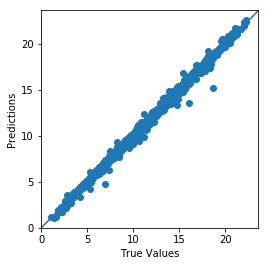

In [31]:
print('RMSE (rndforest): ', np.sqrt(mean_squared_error(test_y, rnd_predb)))
print('MAE: ', mean_absolute_error(test_y, rnd_predb))
plt.scatter(-rnd_predb, -test_y)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 0, 100], [-100, 0 , 100])
plt.show()

The Random Forest regressor give the best results so far.
<br>
<br>
The issue of the coulomb matrix ordering is addressed here. According to Rupp et. al. this issue can be addressed by calculating the eigenvalues of the coulomb matrix of each molecule. the eigen values of the molecules are then ordered from greatest to lowest, "the resulting representation is invariant with respect to the combinations or rotations of the coulomb matrix" (Rupp et al)
The eigen values of the coulomb matrices in the dataset are read into the notebook below and some cleaning and filtering are performed to match the eigenvalues to the energies in the original dataset. 
the dataset is obtained from the github repo at : https://github.com/bhimmetoglu/RoboBohr/tree/master/data

In [33]:
headers = ['id']
for i in range (50):
    headers.append(str(i))
sec_dataset = pd.read_csv("coulombL.csv", delimiter=",", names = headers)
sec_dataset.head()

,id,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,25004.0,0.108338,0.121710,0.125796,0.129661,0.143059,0.148010,0.149170,0.157788,0.159308,...,29.359494,30.020254,32.586196,40.854982,51.26412,53.218666,69.926234,133.875687,0.0,0.0
1,25005.0,0.154412,0.155939,0.163160,0.172905,0.187559,0.199397,0.218298,0.233281,0.255989,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
2,25006.0,0.130949,0.133728,0.140543,0.151511,0.161922,0.169285,0.174153,0.192567,0.216319,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
3,25009.0,0.130755,0.144113,0.144751,0.150850,0.156590,0.158825,0.167177,0.172883,0.180271,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
4,25011.0,0.139998,0.143839,0.149760,0.170269,0.176895,0.185890,0.204783,0.231890,0.235767,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0


In [34]:
idsa = [i for i in dataset["pubchem_id"]]
type(idsa)

list

In [35]:
idsb = [np.int64(i) for i in sec_dataset["id"]]
type(idsb)

list

In [36]:
extracted = []
index = []
for i in range(len(idsb)):
    if idsb[i] in idsa:
        extracted.append(idsb[i])
        index.append(i)
len(extracted)

16242

In [37]:
bools = [idsa[i] == extracted[i] for i in range(len(extracted))]
False in bools

False

In [38]:
coulomb_eig = sec_dataset.iloc[index]
coulomb_eig.head()

,id,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,25004.0,0.108338,0.121710,0.125796,0.129661,0.143059,0.148010,0.149170,0.157788,0.159308,...,29.359494,30.020254,32.586196,40.854982,51.26412,53.218666,69.926234,133.875687,0.0,0.0
1,25005.0,0.154412,0.155939,0.163160,0.172905,0.187559,0.199397,0.218298,0.233281,0.255989,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
2,25006.0,0.130949,0.133728,0.140543,0.151511,0.161922,0.169285,0.174153,0.192567,0.216319,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
3,25009.0,0.130755,0.144113,0.144751,0.150850,0.156590,0.158825,0.167177,0.172883,0.180271,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
4,25011.0,0.139998,0.143839,0.149760,0.170269,0.176895,0.185890,0.204783,0.231890,0.235767,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0


In [39]:
raw_coulomb = coulomb_eig.drop(["id"],axis=1)
raw_coulomb.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.108338,0.121710,0.125796,0.129661,0.143059,0.148010,0.149170,0.157788,0.159308,0.162408,...,29.359494,30.020254,32.586196,40.854982,51.26412,53.218666,69.926234,133.875687,0.0,0.0
1,0.154412,0.155939,0.163160,0.172905,0.187559,0.199397,0.218298,0.233281,0.255989,0.273780,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
2,0.130949,0.133728,0.140543,0.151511,0.161922,0.169285,0.174153,0.192567,0.216319,0.218838,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
3,0.130755,0.144113,0.144751,0.150850,0.156590,0.158825,0.167177,0.172883,0.180271,0.193070,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
4,0.139998,0.143839,0.149760,0.170269,0.176895,0.185890,0.204783,0.231890,0.235767,0.258813,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0


Explained Variance:  0.2571115231171437


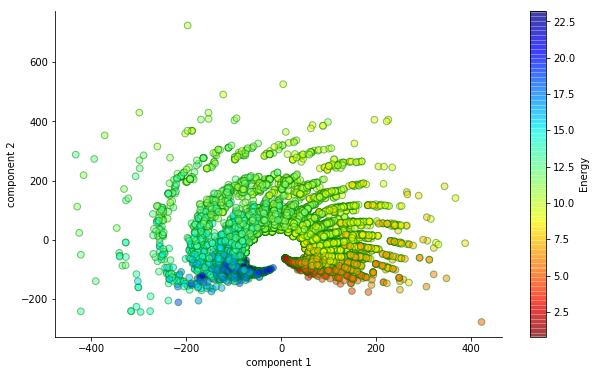

In [40]:
pcab = PCA(n_components=2, random_state=42)
raw_coulomb_r = pcab.fit_transform(raw_coulomb)
print("Explained Variance: ", pcab.explained_variance_ratio_.sum())
figure = plt.figure(figsize = (10,6))
plot = figure.add_subplot(111)
scatter = plot.scatter(-raw_coulomb_r[:,0], raw_coulomb_r[:,1],c=abs(dataset["Eat"]), s=45, edgecolors = 'green', cmap=cm.jet_r, alpha = 0.5)
cbar = figure.colorbar(scatter, ax=plot, label = "Energy")
plt.xlabel("component 1")
plt.ylabel("component 2")
sns.despine()
plt.show()

Again, pca is performed to visualize the new features ( eigen spectrum)

## XGBoost 

The XGBoost model is trained next to see what kind of errors we get

In [41]:
import xgboost as xgb
import time

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 8, alpha = 10, n_estimators = 300)

In [42]:
X, test_X_coul, y, test_y_coul = train_test_split(raw_coulomb, targets, test_size = 0.20)

train_X_coul, val_X_coul, train_y_coul, val_y_coul = train_test_split(X,y,test_size=0.20)
train_X_coul.shape

(10394, 50)

Training is done with all entries of coulomb matrix.

In [43]:
init = time.time()
xg_reg.fit(train_X, train_y)
final = time.time() - init


/anaconda3/envs/rdkitenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [44]:
preds = xg_reg.predict(val_X)
val_error = np.sqrt(mean_squared_error(val_y, preds))
print("training time: ", final)
print("RMSE: ", val_error)
print("MAE: " , mean_absolute_error(val_y,preds))


training time:  75.99694490432739
RMSE:  0.15189568986304625
MAE:  0.08660953487951491


Training is done with eigenvalues of coulomb matrix

In [47]:
xg_reg_coul = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 8, alpha = 10, n_estimators = 300)

init = time.time()
xg_reg_coul.fit(train_X_coul, train_y_coul)
final = time.time() - init

/anaconda3/envs/rdkitenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [48]:
preds_coul = xg_reg_coul.predict(val_X_coul)
val_error_coul = np.sqrt(mean_squared_error(val_y_coul, preds_coul))

print("Training time: ", final)
print("RMSE: ", val_error_coul)
print("MAE: " , mean_absolute_error(val_y_coul,preds_coul))


Training time:  5.5220208168029785
RMSE:  0.15374065873983217
MAE:  0.10978664228177513


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

def giveScores(predictions, true):
    return np.sqrt(mean_squared_error(predictions, true))


In [51]:
rf_reg_coul = RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)
xg_reg_coul = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 8, alpha = 10, n_estimators = 300)

Below the randomforest regressor and xgboost models are trained with both the original coulomb matrix and the eigen values to compare random forest against xgboost
## Cross Validation with eigenvalues for both Xgboost and RandomForest models

In [52]:
rsme = make_scorer(giveScores,greater_is_better=False)

models ={"xgBoost": xg_reg_coul,"randomForest":rf_reg_coul}

scores = [-1.0*cross_val_score(models[i], train_X_coul, train_y_coul, scoring=rsme, cv=5).mean() for i in models] 

/anaconda3/envs/rdkitenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/envs/rdkitenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/envs/rdkitenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/envs/rdkitenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/envs/rdkitenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'b

In [53]:
print("validation RMSE for xgboost trained with eigen values: ", scores[0])
print("validation RMSE for randomforest trained with eigen values: ", scores[1])

validation RMSE for xgboost trained with eigen values:  0.15896957352992738
validation RMSE for randomforest trained with eigen values:  0.1982458427078413


## Cross Validation of both XGBoost and Random Forest models with coulumb matrix entries

In [54]:
rf_reg = RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 8, alpha = 10, n_estimators = 300,n_jobs=-1)
models_full ={"xgBoost": xg_reg,"randomForest":rf_reg}
scores_full_dataset = [-1.0*cross_val_score(models_full[i], train_X, train_y, scoring=rsme, cv=5).mean() for i in models_full] 

/anaconda3/envs/rdkitenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/envs/rdkitenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/envs/rdkitenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/envs/rdkitenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/envs/rdkitenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'b

In [55]:
print("validation RMSE for xgboost trained with full features: ", scores_full_dataset[0])
print("validation RMSE for randomforest trained with full features: ", scores_full_dataset[1])

validation RMSE for xgboost trained with full features:  0.15124631232659197
validation RMSE for randomforest trained with full features:  0.18983206095427088


XGBoost seems to perform better in both cases. Obviously when the full features are used the error is lower.
The hyperparameter fine tuning is done using the eigenvalues as features. These features are normalized first.

In [56]:
normalized_X_coul = normalize(train_X_coul)
normalized_X_val_coul = normalize(val_X_coul)

## Hyperparameter Fine Tuning
A randomized search is performed using the eigenvalues of the coulomb matrix as features. Doing the search in this way saves a lot of time and computation. The parameters that result in the best model will be used to train a new mdoel with all of the entries of the coulomb matrix.

In [57]:
from sklearn.model_selection import RandomizedSearchCV

xg_reg_grid = xgb.XGBRegressor(objective ='reg:linear',eval_metric = 'rmse')
param_grid = {'alpha':[1,10,15],'learning_rate': [0.045, 0.065, 0.1], 'max_depth': [6, 8, 10], 'n_estimators':[300,400,500],\
              'colsample_bytree':[0.1,0.2,0.30],'gamma':[0.01,0.1,1,10], 'min_child_weight':[5, 7, 8],\
             }

rnd_search = RandomizedSearchCV(xg_reg_grid,param_grid,cv=5,scoring='neg_mean_squared_error', verbose = 2, n_iter=105,random_state=54,n_jobs=-1)


Next, a randomized grid search is performed to find the best hyperparameters for the XGBoost model. The search is done with the eigen value features to get some speed up, the best model parameters will be used to train a model with the full dataset

In [58]:
rnd_search.fit(normalized_X_coul,train_y_coul)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:  7.7min finished
/anaconda3/envs/rdkitenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='rmse', gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=105, n_jobs=-1,
          param_distributions={'alpha': [1, 10, 15], 'learning_rate': [0.045, 0.065, 0.1], 'max_depth': [6, 8, 10], 'n_estimators': [300, 400, 500], 'colsample_bytree': [0.1, 0.2, 0.3], 'gamma': [0.01, 0.1, 1, 10], 'min_child_weight': [5, 7, 8]},
          pre_dispatch='2*n_jobs', random_state=54, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

The best parameters are printed below.

In [59]:
rnd_search.best_params_

{'n_estimators': 500,
 'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.045,
 'gamma': 0.01,
 'colsample_bytree': 0.3,
 'alpha': 10}

In [60]:
cvres = rnd_search.cv_results_
mins = []
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    mins.append(np.sqrt(-mean_score))
min(mins)

0.16660203637169083

The best model is used to calculate the error

In [62]:
best_model = rnd_search.best_estimator_
test_X_coul_n = normalize(test_X_coul)
predictions = best_model.predict(normalized_X_val_coul)
test_preds = best_model.predict(test_X_coul_n)
print("best model RMSE val set: ", giveScores(predictions, val_y_coul))
print("best model MAE val set: ", mean_absolute_error(predictions, val_y_coul))
print("best model RMSE test set : ", giveScores(test_preds, test_y_coul))
print("best model MAE test set: ", mean_absolute_error(test_preds, test_y_coul))

best model RMSE val set:  0.16116645213755704
best model MAE val set:  0.10274031063959234
best model RMSE test set :  0.15392906670759576
best model MAE test set:  0.10145307935389124


The full eigenvalue dataset is used to train a model with the hyperparameters found from the grid search.

In [63]:
train_X_coul_full = np.concatenate((normalized_X_coul,normalized_X_val_coul),axis = 0)
train_y_coul_full = np.concatenate((train_y_coul,val_y_coul),axis =0)

RandomForest regressor is trained with eigenvalues for compariosn.

In [77]:
rnd_reg_coul = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
rnd_reg_coul.fit(normalized_X_coul,train_y_coul)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

RMSE:  0.19414708887198473
MAE:  0.11399116215795937


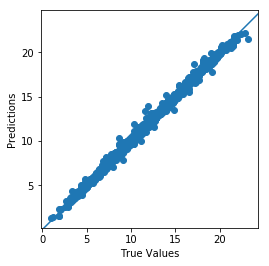

In [78]:
rf_predictions_coul = rnd_reg_coul.predict(test_X_coul_n)
print("RMSE: ", giveScores(rf_predictions_coul,test_y_coul))
print("MAE: ", mean_absolute_error(rf_predictions_coul,test_y_coul))
plt.scatter(-test_y_coul, -rf_predictions_coul)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 0,100], [-100, 0,100])
plt.show()

In [79]:
xg_reg_coul_n = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.045,
                max_depth = 10, alpha = 10, min_child_weight=5, n_estimators = 500, gamma=0.01,reg_lambda=0, eval_metric = 'rmse')
xg_reg_coul_n.fit(train_X_coul_full, train_y_coul_full)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, eval_metric='rmse', gamma=0.01,
       importance_type='gain', learning_rate=0.045, max_delta_step=0,
       max_depth=10, min_child_weight=5, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

RMSE:  0.15186851304677507
MAE:  0.09956266502263715


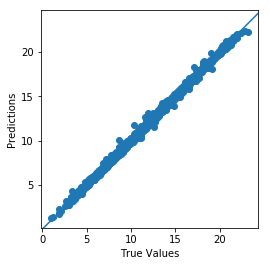

In [80]:
test_predictions_coul = xg_reg_coul_n.predict(test_X_coul_n)
print("RMSE: ", giveScores(test_predictions_coul,test_y_coul))
print("MAE: ", mean_absolute_error(test_predictions_coul,test_y_coul))
plt.scatter(-test_y_coul, -test_predictions_coul)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 0,100], [-100, 0,100])
plt.show()


Using the same parameters,except for max_depth and min_child_weight, another xgboost regressor is trained with the full dataset(including the validation set as was done with the previous model), max_depth and min_child_weight are lowered as there are more features per instance.

In [85]:
xg_reg_full = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.045,
                max_depth = 8, alpha = 10, min_child_weight=8, n_estimators = 500, gamma=0.01,reg_lambda=0, eval_metric = 'rmse')

xg_reg_full.fit(train_X_full, train_y_full)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, eval_metric='rmse', gamma=0.01,
       importance_type='gain', learning_rate=0.045, max_delta_step=0,
       max_depth=8, min_child_weight=8, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

RMSE:  0.14836647335197445
MAE:  0.07930571611372068


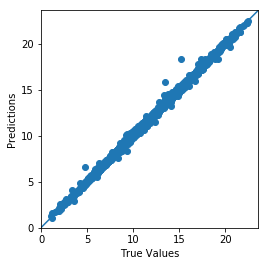

In [86]:
predictions_full = xg_reg_full.predict(test_X.values)
print("RMSE: ", giveScores(predictions_full,test_y.values))
print("MAE: ", mean_absolute_error(predictions_full, test_y.values))
#plt.figure(figsize=(6,6))
plt.scatter(-test_y, -predictions_full)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])
plt.show()

# Neural Networks
The tutorial found at https://www.tensorflow.org/tutorials/keras/basic_regression
is followed to do regression using neural network

In [70]:
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

getModel builds a neural network usig the Sequntial class to set up input, hidden and output layers instantiated with the Dense class

In [71]:
def getModel(dataset):
    keras.backend.clear_session()
    model = keras.Sequential([
    layers.Dense(100, activation=tf.nn.relu, input_shape=[dataset.shape[1]]),
    layers.Dense(65, activation=tf.nn.relu),
    layers.Dense(50, activation=tf.nn.relu ),
    layers.Dense(1)
  ])
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [72]:
nnetwork = getModel(train_X_coul_full)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [73]:
nnetwork.summary()
train_X_coul_full.shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               5100      
_________________________________________________________________
dense_1 (Dense)              (None, 65)                6565      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3300      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 15,016
Trainable params: 15,016
Non-trainable params: 0
_________________________________________________________________


(12993, 50)

the neural network is trained for 500 epochs

In [74]:
n_epochs = 500

history = nnetwork.fit(train_X_coul_full, train_y_coul_full,\
                    epochs=n_epochs, validation_split = 0.2, verbose=0)


Instructions for updating:
Use tf.cast instead.


In [87]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
495,0.025244,0.117632,0.025244,0.061464,0.157371,0.061464,495
496,0.026571,0.121238,0.026571,0.054601,0.145398,0.054601,496
497,0.025212,0.117842,0.025212,0.053911,0.142577,0.053911,497
498,0.026226,0.119789,0.026226,0.053809,0.145667,0.053809,498
499,0.024903,0.116393,0.024903,0.052697,0.147471,0.052697,499


the following function plots the mean absolute error and rmse of the training and validation sets at each epoch

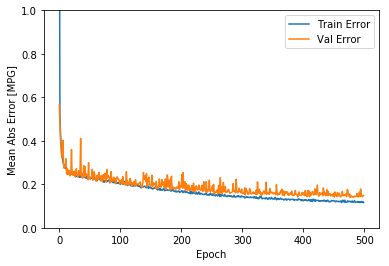

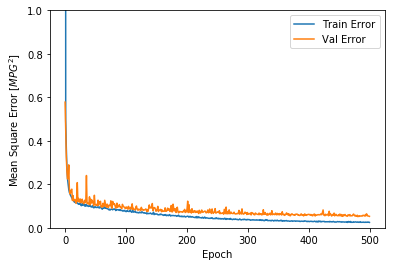

In [88]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.show()


plot_history(history)


at around epoch 60 the rmse does not get any better, thus early stopping is used to train the model and obtain the best performing model

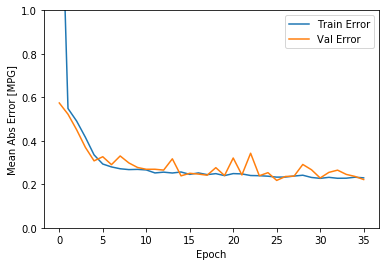

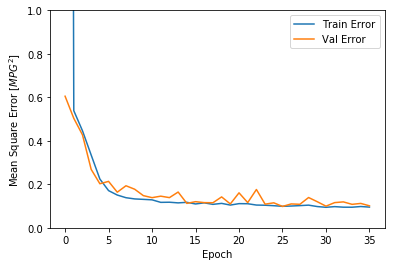

In [89]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
nnetwork_early = getModel(train_X_coul_full)
history = nnetwork_early.fit(train_X_coul_full, train_y_coul_full, epochs=n_epochs*2,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])

plot_history(history)


The test set is used to make predictions and the corresponding errors are obtained

RMSE:  0.3168336931969291
MAE:  0.21979149776283333


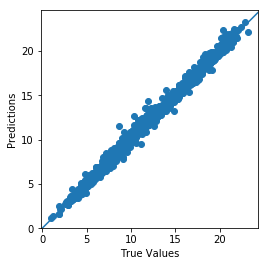

In [90]:
test_predictions = nnetwork_early.predict(test_X_coul_n)
print("RMSE: ", giveScores(test_predictions,test_y_coul))
print("MAE: ", mean_absolute_error(test_predictions, test_y_coul))
plt.scatter(-test_y_coul, -test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])
plt.show()

The full dataset containing all feaures are also used to train the neural network model

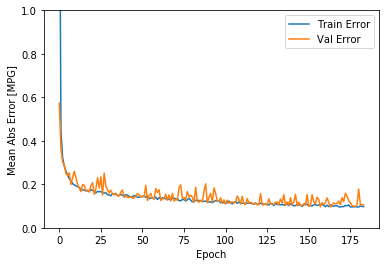

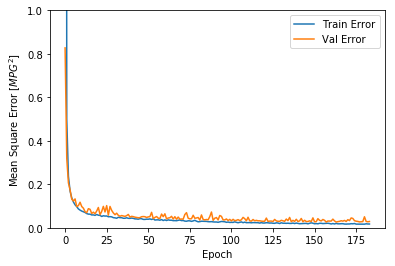

In [91]:
early_stop_b = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
nnetwork_b = getModel(train_X_full)
history_b = nnetwork_b.fit(train_X_full, train_y_full, epochs=n_epochs,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop_b])

plot_history(history_b)

The correspondinf test set is used to make predictions and errors are reported

RMSE:  0.20178957392976998
MAE:  0.10834917270935168


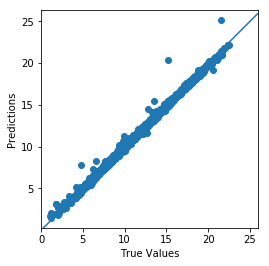

In [92]:
test_predictions_b = nnetwork_b.predict(test_X)
print("RMSE: ", giveScores(test_predictions_b,test_y))
print("MAE: ", mean_absolute_error(test_predictions_b, test_y))
#plt.figure(figsize=(6,6))
plt.scatter(-test_y, -test_predictions_b)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-200, 200], [-200, 200])
plt.show()

In conclusion, the XGboost model performs better than all models observed.